# Sistema de Recomendação
## Baseado em Matrix Factorization SVD

Autores: Andrei Donati, Angelo Baruffi e Luís Felipe Pelison

O DataSet utilizado para este código é o MovieLens (https://grouplens.org/datasets/movielens/). 
A fim de teste, foi adicionado entradas referentes ao desenvolvedor. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.sparse.linalg import svds
%matplotlib inline
import os
os.chdir('c:\\Andrei\\recommender-systems\\dataset')

### Importação dos dados para treino do algoritmo

In [2]:
ratings_df = pd.read_csv("ratings.csv", sep=",")
ratings_df = ratings_df.iloc[:,0:3]

movies_df = pd.read_csv("movies.csv", sep=",")
movies_df['movieId'] = movies_df['movieId'].apply(pd.to_numeric)

me  = np.max(ratings_df['userId']) +1
print("Number of my user is "+str(me))

Number of my user is 672


Adicionando os dados do usuário:

Toy story 1 (3.5) - ted 2 (4.5) - Furious 7 (4) - The Human Centipede III (1) - imitation Game (5) - American Sniper (4.5)
The Expendables 3 (4) - Tammy (2) - Transformers: Age of Extinction (3.5)- Birdman: (5)
The Amazing Spider-Man 2 (3.5) - 300: Rise of an Empire (4.5) - The Lego Movie (1) - American Pie (4)
Kung Fu Panda (3.5) - High School Musical 2 (1) - Star Wars: The Clone Wars (2) - Madagascar: Escape 2 Africa (4)
The Island (4.5) - Fast & Furious 4 (4.5) - Inglourious Basterds (5)

In [22]:
my_ratings= pd.DataFrame([[me, 1, 3.5 ],[ me,135861, 4.5], [ me,133824, 1], [ me,130634, 5]  , [ me,116797, 4.5], 
                           [ me,114662, 4], [ me,112897, 4], [ me,112497, 2], [ me,112370, 3.5],
                           [ me,112183, 5], [ me,110553, 3.5], [ me,109673, 4.5], [ me,108932, 1], 
                           [ me,50189, 4], [ me,59784, 3.5], [ me,61123, 1], [ me,61160, 2], 
                           [ me,62999, 4], [ me,63515, 4.5], [ me,67923, 4.5],
                           [ me,68157, 5]], columns=['userId','movieId','rating']) 

print('Meus filmes preferidos')
my_ratings.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').sort_values(by=['rating'], ascending=False).head(10)

aa


,userId,movieId,rating,title,genres
20,672,68157,5.0,Inglourious Basterds (2009),Action|Drama|War
3,672,130634,5.0,Furious 7 (2015),Action|Crime|Thriller
9,672,112183,5.0,Birdman: Or (The Unexpected Virtue of Ignoranc...,Comedy|Drama
19,672,67923,4.5,"Fast & Furious (Fast and the Furious 4, The) (...",Action|Crime|Drama|Thriller
4,672,116797,4.5,The Imitation Game (2014),Drama|Thriller|War
18,672,63515,4.5,The Island (2006),Drama|Mystery
1,672,135861,4.5,Ted 2 (2015),Comedy
11,672,109673,4.5,300: Rise of an Empire (2014),Action|Drama|War|IMAX
13,672,50189,4.0,American Pie Presents The Naked Mile (American...,Comedy|Romance
5,672,114662,4.0,American Sniper (2014),Action|War


Une os datasets

In [ ]:
already_rated.head(10)

Cria matrix de Users x Filmes 

In [4]:
R_df = ratings_df.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
R_df.tail()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
670,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
671,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualização de algumas informações importantes

Entradas não nulas da matriz

In [5]:
print('% entradas não nulas: {:0.4f} %'.format(100*(np.count_nonzero(R_df>0.0)/(R_df.shape[0]*R_df.shape[1]))) )

% entradas não nulas: 1.6418 %


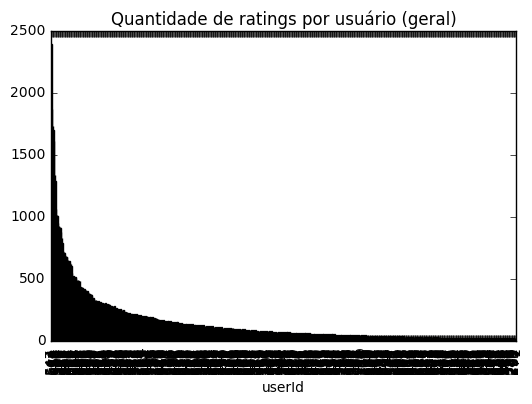

In [6]:
R_df[R_df>0.0].count(axis = 1).sort_values(ascending= False).plot(kind='bar', title='Quantidade de ratings por usuário (geral)')

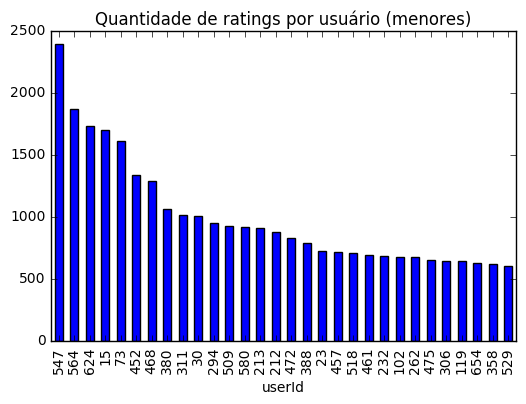

In [7]:
R_df[R_df>0.0].count(axis = 1).sort_values(ascending= False).head(30).plot(kind='bar', title='Quantidade de ratings por usuário (menores)')

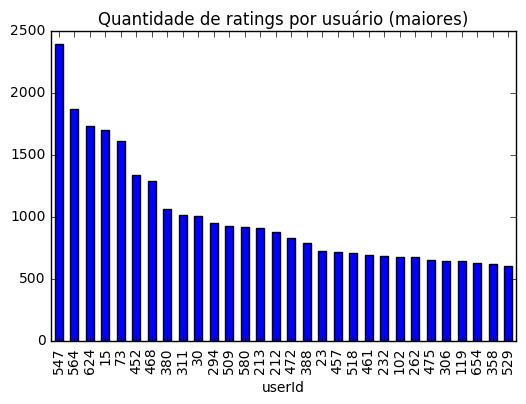

In [8]:
R_df[R_df>0.0].count(axis = 1).sort_values(ascending= False).head(30).plot(kind='bar', title='Quantidade de ratings por usuário (maiores)')

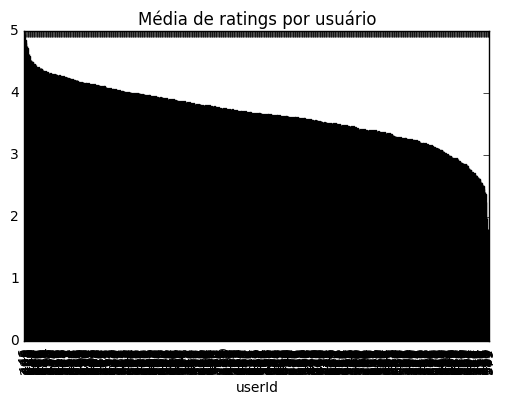

In [9]:
R_df[R_df>0.0].mean(axis = 1).sort_values(ascending= False).plot(kind='bar', title='Média de ratings por usuário' )

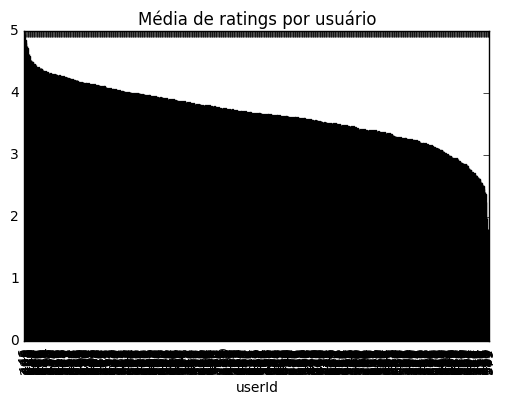

In [10]:
R_df[R_df>0.0].mean(axis = 1).sort_values(ascending= False).plot(kind='bar', title='Média de ratings por usuário')

### Algoritmo SVD

Substitui os valores nulos por 0 e transforma a matrix de reviews em uma matrix com uma diferença da média do usuário


In [11]:
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

Aplica a transformação SVD

In [12]:
U, sigma, Vt = svds(R_demeaned, k = 50)

sigma = np.diag(sigma)

Reconstroi a matrix de ratings

In [13]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings = all_user_predicted_ratings + user_ratings_mean.reshape(-1, 1)
del U, sigma, Vt,  R, user_ratings_mean
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)
del all_user_predicted_ratings

Define alguns parâmetros

In [14]:
userId= me
num_recommendations= 10

Filtra os filmes já assistidos

In [15]:
user_row_number = userId - 1 

#pega as filmes que o usuário já assistiu
sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) 
    
user_data = ratings_df[ratings_df['userId'] == (userId)]
already_rated = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                sort_values(['rating'], ascending=False)
            )

print('Usuário {0} já deixou seu rating para {1} filmes.'.format(userId, already_rated.shape[0]) )
  

Usuário 672 já deixou seu rating para 21 filmes.


Busca as predições

In [16]:
predictions = (movies_df[movies_df['movieId'].isin(already_rated['movieId'])].
                     merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                   left_on = 'movieId', right_on = 'movieId').
                   rename(columns = {user_row_number: 'Predictions'}).
                   sort_values('Predictions', ascending = False).
                   iloc[:num_recommendations, :-1]
                  )

print('Recomendando top {0} filmes ainda não vistou pelo usuário.'.format(num_recommendations))

Recomendando top 10 filmes ainda não vistou pelo usuário.


Filmes que 

In [17]:
already_rated.head(10)

,userId,movieId,rating,title,genres
20,672,68157,5.0,Inglourious Basterds (2009),Action|Drama|War
3,672,130634,5.0,Furious 7 (2015),Action|Crime|Thriller
9,672,112183,5.0,Birdman: Or (The Unexpected Virtue of Ignoranc...,Comedy|Drama
19,672,67923,4.5,"Fast & Furious (Fast and the Furious 4, The) (...",Action|Crime|Drama|Thriller
4,672,116797,4.5,The Imitation Game (2014),Drama|Thriller|War
18,672,63515,4.5,The Island (2006),Drama|Mystery
1,672,135861,4.5,Ted 2 (2015),Comedy
11,672,109673,4.5,300: Rise of an Empire (2014),Action|Drama|War|IMAX
13,672,50189,4.0,American Pie Presents The Naked Mile (American...,Comedy|Romance
5,672,114662,4.0,American Sniper (2014),Action|War


### Recomendações

In [18]:
predictions

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,68157,Inglourious Basterds (2009),Action|Drama|War
17,116797,The Imitation Game (2014),Drama|Thriller|War
2,59784,Kung Fu Panda (2008),Action|Animation|Children|Comedy|IMAX
12,112183,Birdman: Or (The Unexpected Virtue of Ignoranc...,Comedy|Drama
9,108932,The Lego Movie (2014),Action|Adventure|Animation|Children|Comedy|Fan...
16,114662,American Sniper (2014),Action|War
5,62999,Madagascar: Escape 2 Africa (2008),Action|Adventure|Animation|Children|Comedy|IMAX
11,110553,The Amazing Spider-Man 2 (2014),Action|Sci-Fi|IMAX
10,109673,300: Rise of an Empire (2014),Action|Drama|War|IMAX
